In [367]:
import pandas as pd
import numpy as np
                            
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor 
from scipy.stats import skew,zscore
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

import pickle
from joblib import dump
import json

# Problem statment

# Data Gathering

In [371]:
df = pd.read_csv("city_day.csv")

In [373]:
df.head()

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,Ahmedabad,01-01-2015,NaN,NaN,18.22,0.92,27.64,133.36,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,15.69,0.97,24.55,34.06,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,19.30,17.40,29.07,30.70,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,18.48,1.70,18.59,36.08,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,21.42,22.10,39.33,39.31,NaN


In [375]:
df.tail()

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
29526,Visakhapatnam,27-06-2020,15.02,50.94,25.06,0.47,8.55,23.30,41.0
29527,Visakhapatnam,28-06-2020,24.38,74.09,26.06,0.52,12.72,30.14,70.0
29528,Visakhapatnam,29-06-2020,22.91,65.73,29.53,0.48,8.42,30.96,68.0
29529,Visakhapatnam,30-06-2020,16.64,49.97,29.26,0.52,9.84,28.30,54.0
29530,Visakhapatnam,01-07-2020,15.00,66.00,26.85,0.59,2.10,17.05,50.0


In [377]:
df.sample(10)

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
16944,Jaipur,06-06-2018,59.58,191.06,15.35,0.82,8.07,94.49,189.0
387,Ahmedabad,23-01-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,Ahmedabad,06-01-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16282,Hyderabad,01-09-2019,11.85,19.79,12.75,0.40,6.07,14.10,44.0
27919,Thiruvananthapuram,03-02-2020,38.13,68.97,24.45,1.04,7.37,47.23,73.0
7441,Brajrajnagar,04-04-2020,64.28,162.17,NaN,0.31,4.28,72.79,164.0
19497,Kolkata,19-07-2019,15.02,30.29,14.16,0.37,2.56,19.86,53.0
24486,Patna,12-02-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15989,Hyderabad,12-11-2018,62.68,148.54,50.55,0.58,27.46,43.16,127.0
18420,Jorapokhar,09-04-2019,54.19,101.85,9.48,NaN,9.89,14.99,87.0


In [379]:
df.shape

(29531, 9)

In [381]:
df.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,24933.000000,18391.000000,25946.000000,27472.000000,25677.000000,25509.000000,24850.000000
mean,67.450578,118.127103,28.560659,2.248598,14.531977,34.491430,166.463581
std,64.661449,90.605110,24.474746,6.962884,18.133775,21.694928,140.696585
min,0.040000,0.010000,0.010000,0.000000,0.010000,0.010000,13.000000
25%,28.820000,56.255000,11.750000,0.510000,5.670000,18.860000,81.000000
50%,48.570000,95.680000,21.690000,0.890000,9.160000,30.840000,118.000000
75%,80.590000,149.745000,37.620000,1.450000,15.220000,45.570000,208.000000
max,949.990000,1000.000000,362.210000,175.810000,193.860000,257.730000,2049.000000


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    29531 non-null  object 
 1   Date    29531 non-null  object 
 2   PM2.5   24933 non-null  float64
 3   PM10    18391 non-null  float64
 4   NO2     25946 non-null  float64
 5   CO      27472 non-null  float64
 6   SO2     25677 non-null  float64
 7   O3      25509 non-null  float64
 8   AQI     24850 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.0+ MB


# checking Unique values

In [386]:
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
City : 26
Date : 2009
PM2.5 : 11716
PM10 : 12571
NO2 : 7404
CO : 1779
SO2 : 4761
O3 : 7699
AQI : 829


# Checking null values

In [281]:
df.isna().sum()

City         0
Date         0
PM2.5     4598
PM10     11140
NO2       3585
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

# Store the numerical columns in list

In [284]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [286]:
num_cols

Index(['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

# Fill all null values with the median in every column

In [289]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Again, Checking null values

In [292]:
df.isna().sum()

City     0
Date     0
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

# Find Outliers

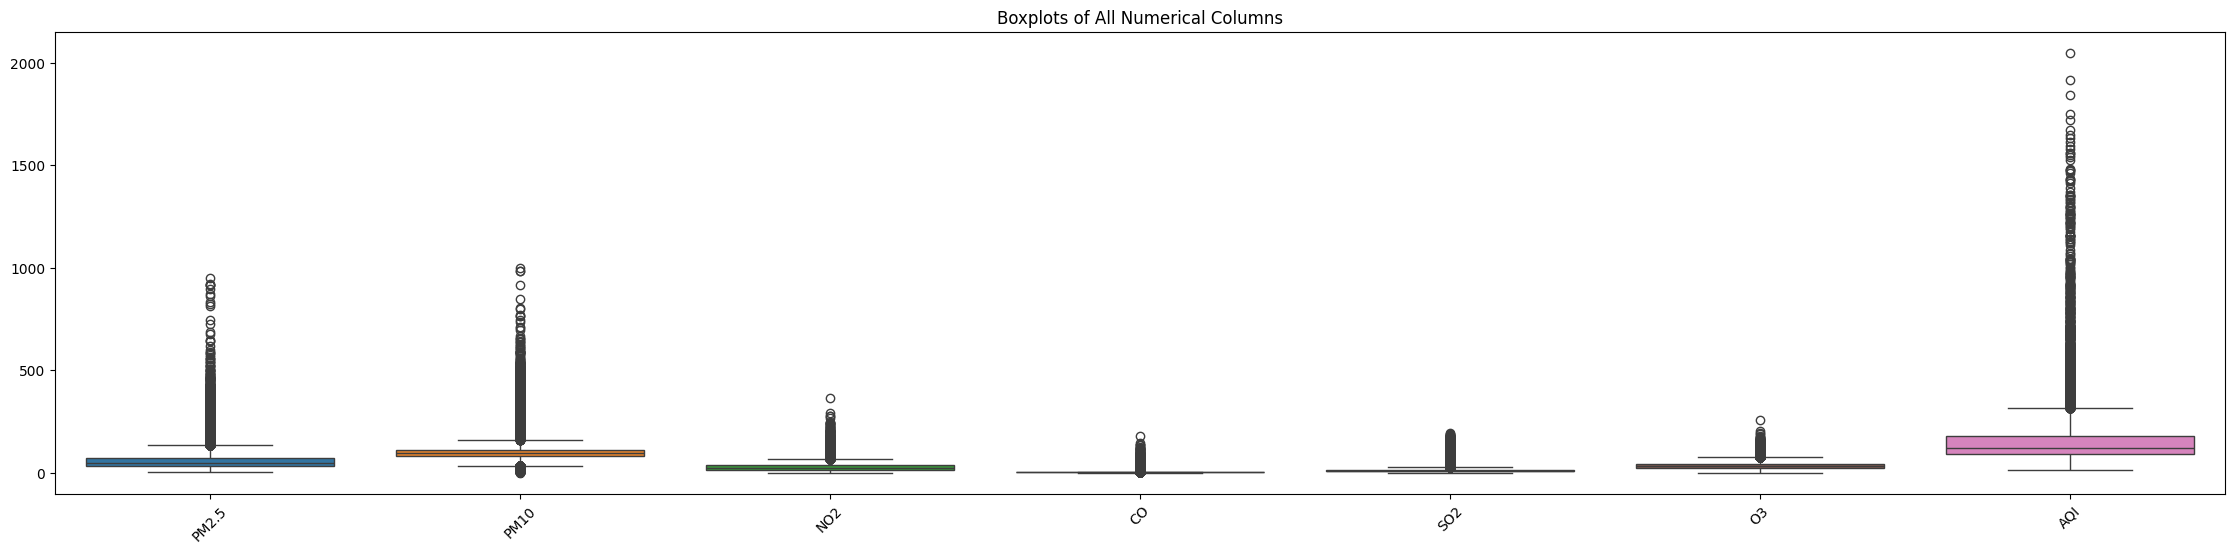

In [295]:
# Set figure size dynamically based on number of columns
plt.figure(figsize=(len(num_cols)*4, 6))

sns.boxplot(data=df[num_cols])
plt.title("Boxplots of All Numerical Columns")
plt.xticks(rotation=45) 
plt.show()


# Handling Outliers Using IQR Method

In [298]:
for col in num_cols:
    print(f"Processing column: {col}")
    
    # Fill missing values with median first
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    
    # Calculate quartiles and IQR on the filled data
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate outlier thresholds
    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr
    
    # Count outliers before capping
    upper_outliers = df[df[col] > upper_tail][col].count()
    lower_outliers = df[df[col] < lower_tail][col].count()
    
    # --- The Change is Here ---
    # CAPPING: Replace outliers with the tail values instead of the median
    df.loc[df[col] > upper_tail, col] = upper_tail
    df.loc[df[col] < lower_tail, col] = lower_tail
    
    # Print statistics
    print(" Q1:", q1)
    print(" Q3:", q3)
    print(" IQR:", iqr)
    print(" Upper Tail (Capping Value):", upper_tail)
    print(" Lower Tail (Capping Value):", lower_tail)
    print(f"Outliers capped: Upper={upper_outliers}, Lower={lower_outliers}")
    print("-"*50)

Processing column: PM2.5
 Q1: 32.15
 Q3: 72.45
 IQR: 40.300000000000004
 Upper Tail (Capping Value): 132.9
 Lower Tail (Capping Value): -28.300000000000004
Outliers capped: Upper=2736, Lower=0
--------------------------------------------------
Processing column: PM10
 Q1: 79.315
 Q3: 111.88
 IQR: 32.565
 Upper Tail (Capping Value): 160.7275
 Lower Tail (Capping Value): 30.4675
Outliers capped: Upper=3970, Lower=1352
--------------------------------------------------
Processing column: NO2
 Q1: 12.98
 Q3: 34.665
 IQR: 21.685
 Upper Tail (Capping Value): 67.1925
 Lower Tail (Capping Value): -19.547499999999996
Outliers capped: Upper=1743, Lower=0
--------------------------------------------------
Processing column: CO
 Q1: 0.54
 Q3: 1.38
 IQR: 0.8399999999999999
 Upper Tail (Capping Value): 2.6399999999999997
 Lower Tail (Capping Value): -0.7199999999999998
Outliers capped: Upper=2747, Lower=0
--------------------------------------------------
Processing column: SO2
 Q1: 6.09
 Q3: 13.81


# Again, Checking Outliers

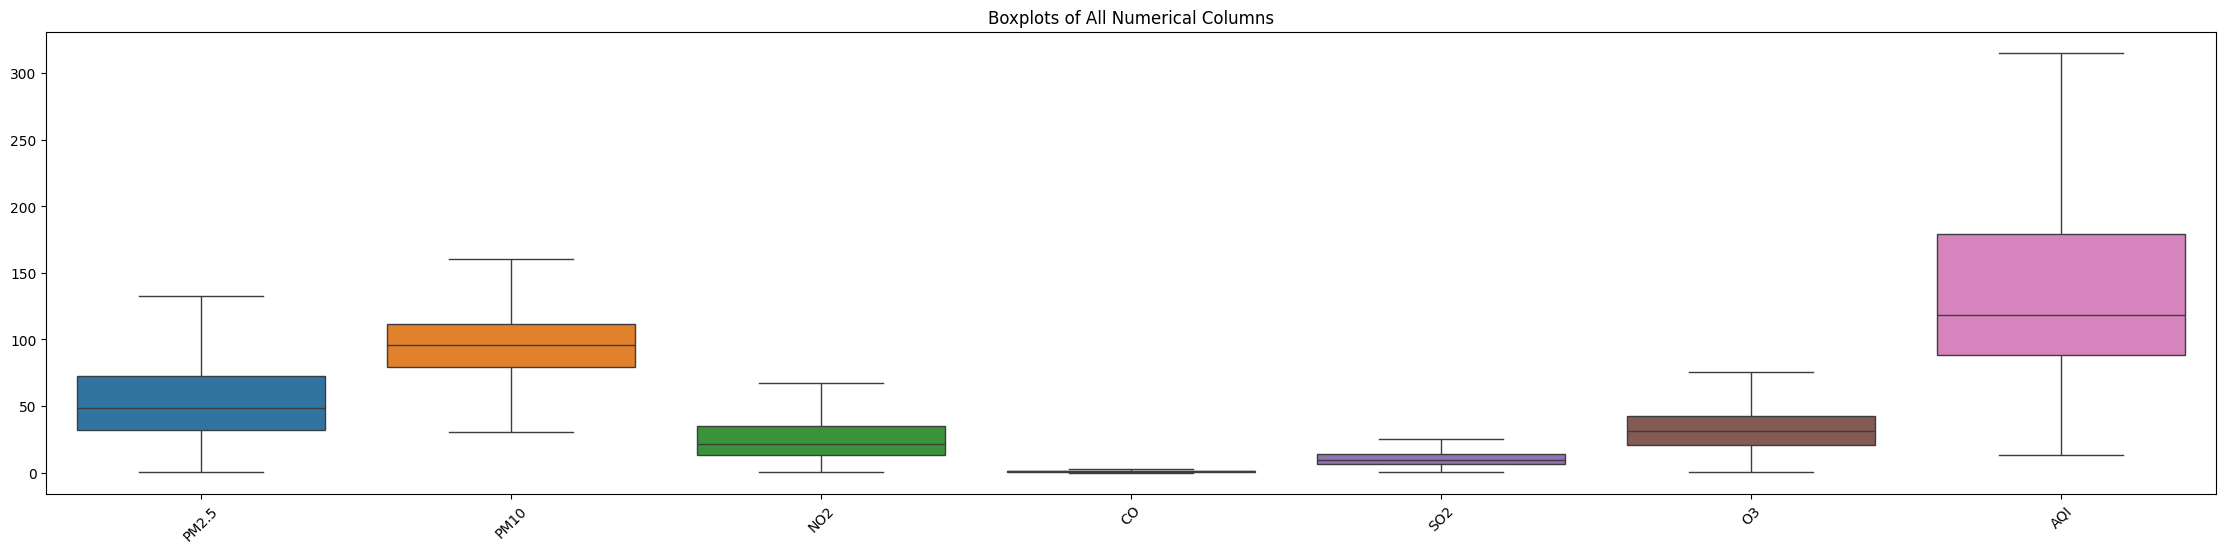

In [301]:
# Set figure size dynamically based on number of columns
plt.figure(figsize=(len(num_cols)*4, 6))

# Create boxplot for all numerical columns in one figure
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of All Numerical Columns")
plt.xticks(rotation=45)  # Rotate column names for better visibility
plt.show()


# find Skewness and handle it

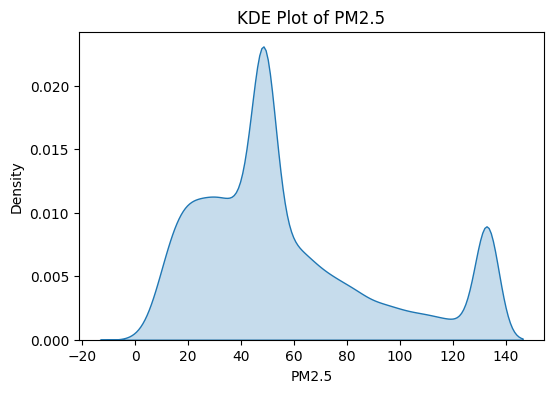

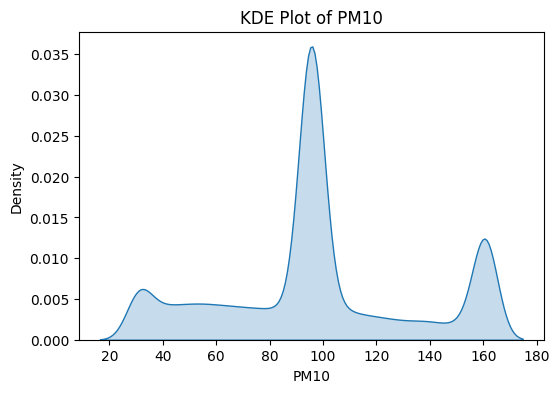

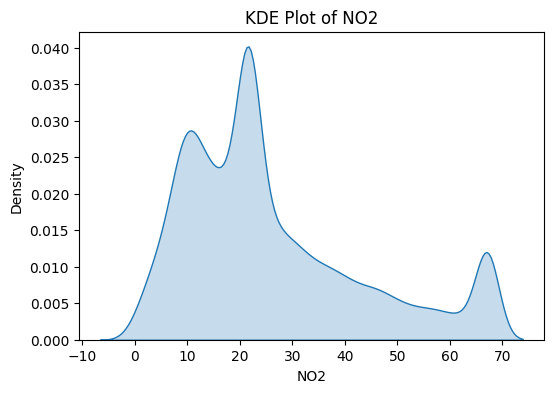

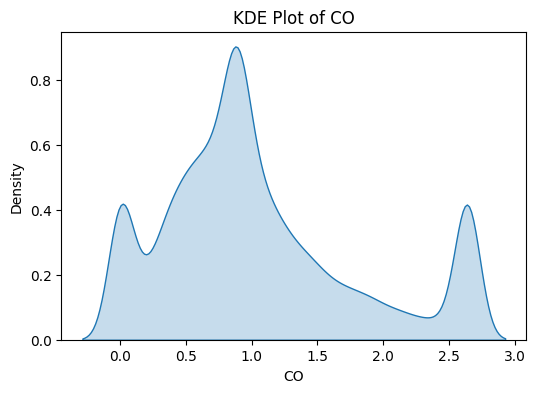

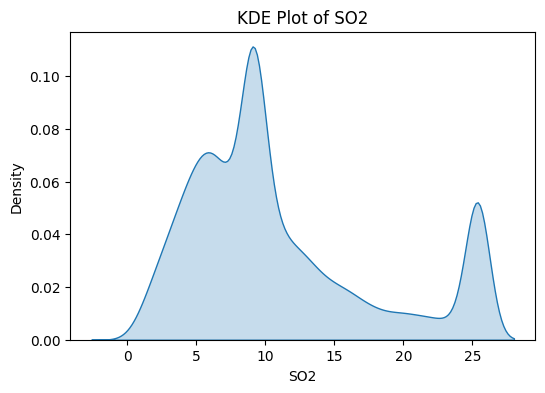

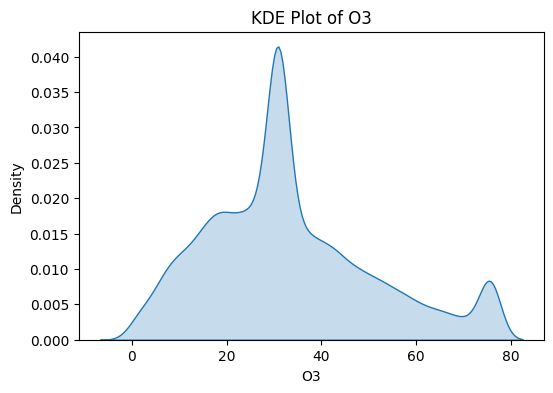

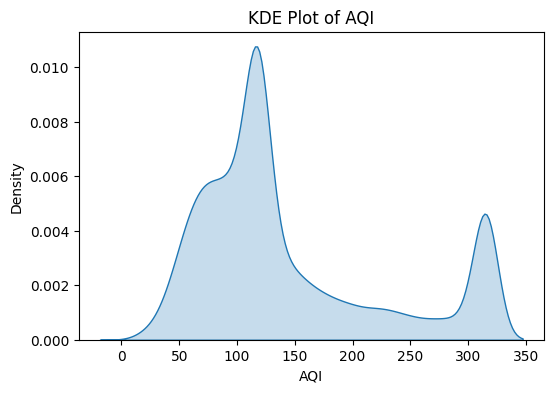

In [304]:
# Select all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot KDE for each numerical column
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


In [306]:
num_cols

Index(['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

Processing column: PM2.5
Old Skewness: 0.9300
Best Transformation: cbrt
New Skewness: 0.0849
--------------------------------------------------
Processing column: PM10
Old Skewness: 0.1511
Best Transformation: cbrt
New Skewness: -0.5290
--------------------------------------------------
Processing column: NO2
Old Skewness: 0.9697
Best Transformation: cbrt
New Skewness: -0.0942
--------------------------------------------------
Processing column: CO
Old Skewness: 0.7947
Best Transformation: sqrt
New Skewness: 0.4439
--------------------------------------------------
Processing column: SO2
Old Skewness: 0.9581
Best Transformation: cbrt
New Skewness: 0.1478
--------------------------------------------------
Processing column: O3
Old Skewness: 0.6396
Best Transformation: sqrt
New Skewness: -0.1114
--------------------------------------------------
Processing column: AQI
Old Skewness: 1.0076
Best Transformation: log
New Skewness: 0.0190
--------------------------------------------------


In [308]:
df

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,Ahmedabad,01-01-2015,48.57,95.68,18.22,0.92,25.39,75.715,118.0
1,Ahmedabad,02-01-2015,48.57,95.68,15.69,0.97,24.55,34.060,118.0
2,Ahmedabad,03-01-2015,48.57,95.68,19.30,2.64,25.39,30.700,118.0
3,Ahmedabad,04-01-2015,48.57,95.68,18.48,1.70,18.59,36.080,118.0
4,Ahmedabad,05-01-2015,48.57,95.68,21.42,2.64,25.39,39.310,118.0
...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,25.06,0.47,8.55,23.300,41.0
29527,Visakhapatnam,28-06-2020,24.38,74.09,26.06,0.52,12.72,30.140,70.0
29528,Visakhapatnam,29-06-2020,22.91,65.73,29.53,0.48,8.42,30.960,68.0
29529,Visakhapatnam,30-06-2020,16.64,49.97,29.26,0.52,9.84,28.300,54.0


# City column

In [310]:
df['City'].value_counts()

City
Ahmedabad             2009
Bengaluru             2009
Chennai               2009
Mumbai                2009
Lucknow               2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: count, dtype: int64

In [312]:
df["City"].isna().sum()

np.int64(0)

In [314]:
df["City"].nunique()

26

In [316]:
df= pd.get_dummies(df,columns=["City"],dtype=int)

In [318]:
df

,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,City_Ahmedabad,City_Aizawl,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,01-01-2015,48.57,95.68,18.22,0.92,25.39,75.715,118.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,02-01-2015,48.57,95.68,15.69,0.97,24.55,34.060,118.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,03-01-2015,48.57,95.68,19.30,2.64,25.39,30.700,118.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,04-01-2015,48.57,95.68,18.48,1.70,18.59,36.080,118.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,05-01-2015,48.57,95.68,21.42,2.64,25.39,39.310,118.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,27-06-2020,15.02,50.94,25.06,0.47,8.55,23.300,41.0,0,0,...,0,0,0,0,0,0,0,0,0,1
29527,28-06-2020,24.38,74.09,26.06,0.52,12.72,30.140,70.0,0,0,...,0,0,0,0,0,0,0,0,0,1
29528,29-06-2020,22.91,65.73,29.53,0.48,8.42,30.960,68.0,0,0,...,0,0,0,0,0,0,0,0,0,1
29529,30-06-2020,16.64,49.97,29.26,0.52,9.84,28.300,54.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     29531 non-null  object 
 1   PM2.5                    29531 non-null  float64
 2   PM10                     29531 non-null  float64
 3   NO2                      29531 non-null  float64
 4   CO                       29531 non-null  float64
 5   SO2                      29531 non-null  float64
 6   O3                       29531 non-null  float64
 7   AQI                      29531 non-null  float64
 8   City_Ahmedabad           29531 non-null  int64  
 9   City_Aizawl              29531 non-null  int64  
 10  City_Amaravati           29531 non-null  int64  
 11  City_Amritsar            29531 non-null  int64  
 12  City_Bengaluru           29531 non-null  int64  
 13  City_Bhopal              29531 non-null  int64  
 14  City_Brajrajnagar     

# Date column

In [323]:
df["Date"].isna().sum()

np.int64(0)

In [325]:
# Convert 'Date' column to datetime 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Extract only the key features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.weekday     # numeric (0=Mon, 6=Sun)
df['IsWeekend'] = df['Date'].dt.dayofweek >= 5   # True for Saturday/Sunday


In [327]:
df.sample(4)

,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI,City_Ahmedabad,City_Aizawl,...,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Year,Month,DayOfWeek,IsWeekend
281,2015-10-09,132.90,95.6800,34.86,2.64,25.39,31.96,315.5,1,0,...,0,0,0,0,0,0,2015,10,4,False
124,2015-05-05,83.99,95.6800,0.08,2.64,25.39,69.57,227.0,1,0,...,0,0,0,0,0,0,2015,5,1,False
5354,2017-11-26,15.67,69.6700,48.12,0.90,3.75,35.73,69.0,0,0,...,0,0,0,0,0,0,2017,11,6,True
3610,2018-08-18,48.57,30.4675,9.46,0.89,6.39,39.73,64.0,0,0,...,0,0,0,0,0,0,2018,8,5,True


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     29531 non-null  datetime64[ns]
 1   PM2.5                    29531 non-null  float64       
 2   PM10                     29531 non-null  float64       
 3   NO2                      29531 non-null  float64       
 4   CO                       29531 non-null  float64       
 5   SO2                      29531 non-null  float64       
 6   O3                       29531 non-null  float64       
 7   AQI                      29531 non-null  float64       
 8   City_Ahmedabad           29531 non-null  int64         
 9   City_Aizawl              29531 non-null  int64         
 10  City_Amaravati           29531 non-null  int64         
 11  City_Amritsar            29531 non-null  int64         
 12  City_Bengaluru           29531 n

In [331]:
df['IsWeekend'] = df['IsWeekend'].astype(int)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     29531 non-null  datetime64[ns]
 1   PM2.5                    29531 non-null  float64       
 2   PM10                     29531 non-null  float64       
 3   NO2                      29531 non-null  float64       
 4   CO                       29531 non-null  float64       
 5   SO2                      29531 non-null  float64       
 6   O3                       29531 non-null  float64       
 7   AQI                      29531 non-null  float64       
 8   City_Ahmedabad           29531 non-null  int64         
 9   City_Aizawl              29531 non-null  int64         
 10  City_Amaravati           29531 non-null  int64         
 11  City_Amritsar            29531 non-null  int64         
 12  City_Bengaluru           29531 n

In [335]:
# Drop the "Date" column
df = df.drop("Date", axis=1)
df

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,City_Ahmedabad,City_Aizawl,City_Amaravati,...,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Year,Month,DayOfWeek,IsWeekend
0,48.57,95.68,18.22,0.92,25.39,75.715,118.0,1,0,0,...,0,0,0,0,0,0,2015,1,3,0
1,48.57,95.68,15.69,0.97,24.55,34.060,118.0,1,0,0,...,0,0,0,0,0,0,2015,1,4,0
2,48.57,95.68,19.30,2.64,25.39,30.700,118.0,1,0,0,...,0,0,0,0,0,0,2015,1,5,1
3,48.57,95.68,18.48,1.70,18.59,36.080,118.0,1,0,0,...,0,0,0,0,0,0,2015,1,6,1
4,48.57,95.68,21.42,2.64,25.39,39.310,118.0,1,0,0,...,0,0,0,0,0,0,2015,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,0.47,8.55,23.300,41.0,0,0,0,...,0,0,0,0,0,1,2020,6,5,1
29527,24.38,74.09,26.06,0.52,12.72,30.140,70.0,0,0,0,...,0,0,0,0,0,1,2020,6,6,1
29528,22.91,65.73,29.53,0.48,8.42,30.960,68.0,0,0,0,...,0,0,0,0,0,1,2020,6,0,0
29529,16.64,49.97,29.26,0.52,9.84,28.300,54.0,0,0,0,...,0,0,0,0,0,1,2020,6,1,0


In [338]:
df.to_csv("Final Data.csv")

# correlation and heatmap

In [341]:
# Compute correlation matrix
corr = df.corr()
corr.head(1)

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,City_Ahmedabad,City_Aizawl,City_Amaravati,...,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam,Year,Month,DayOfWeek,IsWeekend
PM2.5,1.0,0.611171,0.456984,0.357817,0.254233,0.22404,0.843698,0.022842,-0.070088,-0.097919,...,-0.107012,0.187789,-0.083186,-0.009137,-0.160687,-0.066512,-0.184404,0.00154,-0.008971,-0.011794


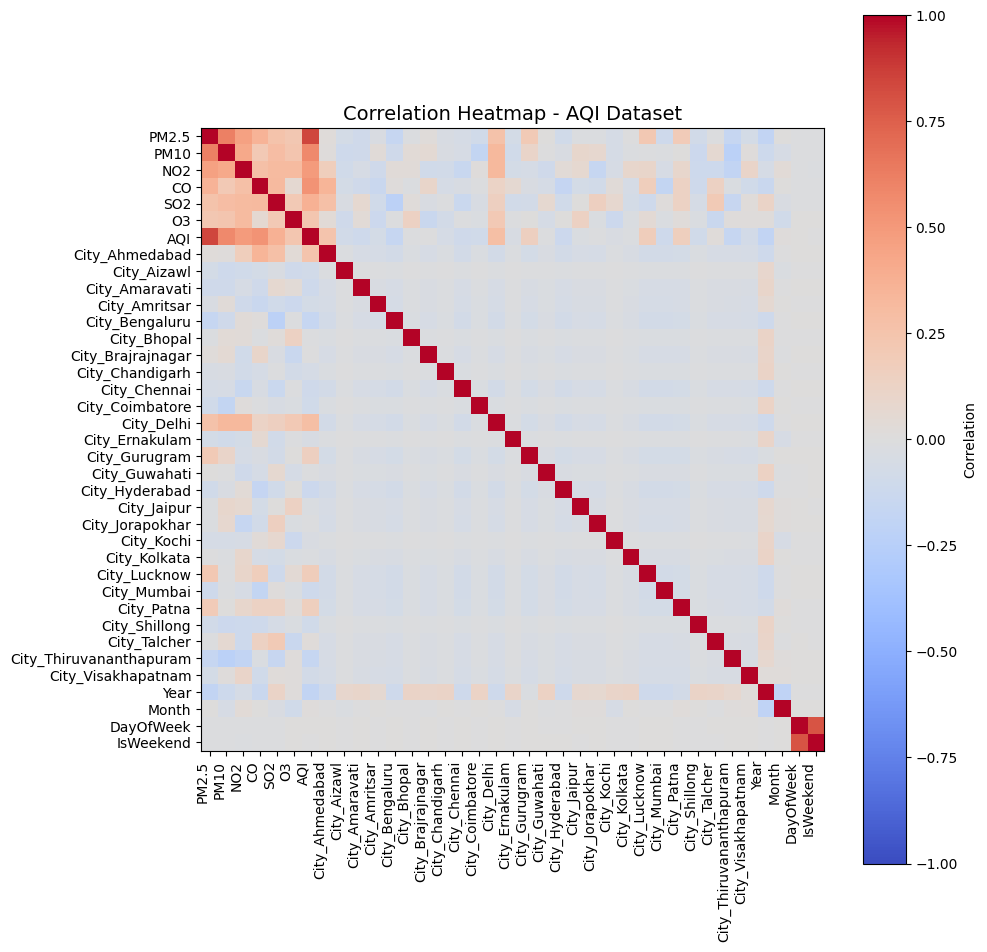

In [343]:
# Plot correlation heatmap
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap - AQI Dataset", fontsize=14)
plt.tight_layout()
plt.show()

## Drop Target column 

In [346]:
X=df.drop("AQI",axis=1)
y=df["AQI"]

# Creating train test split

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model Selection

In [353]:
# Define models to test
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluate each model
print(f"{'Model':20s} | {'R²':>8s} | {'MSE':>10s} | {'RMSE':>10s} | {'MAE':>10s}")
print("-"*75)

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{name:20s} | {r2:8.4f} | {mse:10.4f} | {rmse:10.4f} | {mae:10.4f}")


Model                |       R² |        MSE |       RMSE |        MAE
---------------------------------------------------------------------------
LinearRegression     |   0.8143 |  1258.0607 |    35.4692 |    25.0767
Ridge                |   0.8143 |  1258.0600 |    35.4691 |    25.0764
Lasso                |   0.8143 |  1258.2126 |    35.4713 |    25.0763
DecisionTree         |   0.7990 |  1361.6992 |    36.9012 |    20.4848
RandomForest         |   0.8963 |   702.4766 |    26.5043 |    15.3994
GradientBoosting     |   0.8814 |   803.7812 |    28.3510 |    17.9588
XGBoost              |   0.8936 |   721.2019 |    26.8552 |    15.7285


# RandomForest

In [355]:
# Base model
rf = RandomForestRegressor(random_state=42)

# Parameter grid for tuning
param_dist = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.3, 0.5],
    'bootstrap': [True, False]
}

# Randomized search with 3-fold CV
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,                  # try 30 combinations 
    cv=3,                       # 3-fold cross validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,                  # use all CPU cores
    random_state=42,
    verbose=2
)

# Fit search
search.fit(X_train, y_train)

print("\nBest Parameters:", search.best_params_)
best_rf = search.best_estimator_

# Evaluate tuned model
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nAfter Hyperparameter Tuning:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 50, 'bootstrap': False}

After Hyperparameter Tuning:
R²: 0.9026
MSE: 659.7122
RMSE: 25.6849
MAE: 14.9875


# Training Accuracy

In [357]:
y_pred_train=best_rf.predict(X_train)
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)
print("r2 :",r2)
print("MSE :",mse)
print("RMSE :",rmse) 
print("MAE :",mae) 

r2 : 0.9801384069779463
MSE : 135.86575606557926
RMSE : 11.656146707449219
MAE : 6.37653483992041


# Testing Accuracy

In [359]:
y_pred_test=best_rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)
print("r2 :",r2)
print("MSE :",mse)
print("RMSE :",rmse) 
print("MAE :",mae) 

r2 : 0.9026387978467469
MSE : 659.712170225289
RMSE : 25.684862667051366
MAE : 14.987476705805088


### Save the tuned Random Forest model

In [365]:
# saving model to joblib
dump(best_rf, 'best_random_forest_model.joblib')

print("Model dumped successfully as 'best_random_forest_model.joblib'")

Model dumped successfully as 'best_random_forest_model.joblib'


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM2.5                    29531 non-null  float64
 1   PM10                     29531 non-null  float64
 2   NO2                      29531 non-null  float64
 3   CO                       29531 non-null  float64
 4   SO2                      29531 non-null  float64
 5   O3                       29531 non-null  float64
 6   AQI                      29531 non-null  float64
 7   City_Ahmedabad           29531 non-null  int64  
 8   City_Aizawl              29531 non-null  int64  
 9   City_Amaravati           29531 non-null  int64  
 10  City_Amritsar            29531 non-null  int64  
 11  City_Bengaluru           29531 non-null  int64  
 12  City_Bhopal              29531 non-null  int64  
 13  City_Brajrajnagar        29531 non-null  int64  
 14  City_Chandigarh       

In [402]:
cities = ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 
          'Delhi','Dhule', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar',
           'Kochi', 'Kolkata', 'Lucknow', 'Mumbai','Pune', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam', 'Other']

for i,v in enumerate(cities):
     print(f"the city is {v} and the number is {i}")

the city is Ahmedabad and the number is 0
the city is Aizawl and the number is 1
the city is Amaravati and the number is 2
the city is Amritsar and the number is 3
the city is Bengaluru and the number is 4
the city is Bhopal and the number is 5
the city is Brajrajnagar and the number is 6
the city is Chandigarh and the number is 7
the city is Chennai and the number is 8
the city is Coimbatore and the number is 9
the city is Delhi and the number is 10
the city is Dhule and the number is 11
the city is Ernakulam and the number is 12
the city is Gurugram and the number is 13
the city is Guwahati and the number is 14
the city is Hyderabad and the number is 15
the city is Jaipur and the number is 16
the city is Jorapokhar and the number is 17
the city is Kochi and the number is 18
the city is Kolkata and the number is 19
the city is Lucknow and the number is 20
the city is Mumbai and the number is 21
the city is Pune and the number is 22
the city is Patna and the number is 23
the city is Sh